In [1]:
!pip install pandas scikit-learn

In [2]:
!pip install matplotlib

In [3]:
import tkinter as tk
from tkinter import messagebox, ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=load_iris()

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["species"] = data.target

In [6]:
print(df.head(5))
x=df[data.feature_names]
y=df["species"]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [7]:
df["species"].value_counts()/float(len(df))

species
0    0.333333
1    0.333333
2    0.333333
Name: count, dtype: float64

In [8]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.3,random_state=2)

In [9]:
root = tk.Tk()
root.title("Iris Classification App")
root.geometry("900x800")

plot_frame = tk.Frame(root)
plot_frame.pack(pady=20)

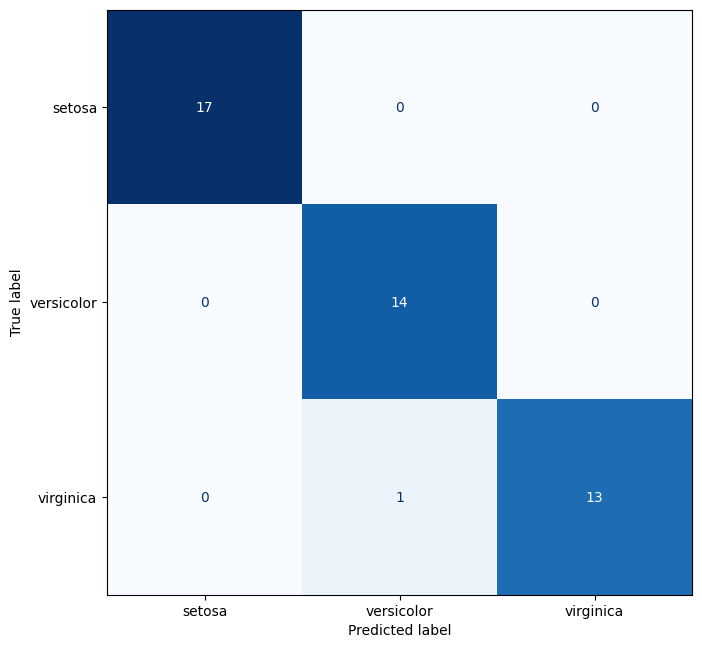

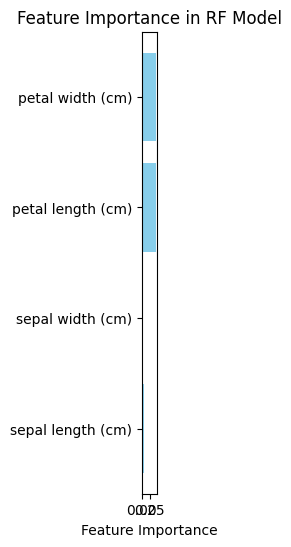

In [10]:
def run_model():
    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=2)
    model.fit(train_x, train_y)
    prediction = model.predict(val_x)

    # Calculate accuracy
    accuracy = accuracy_score(prediction, val_y) * 100
    rounded_acc = round(accuracy, 2)

    # Show accuracy in a pop-up message
    messagebox.showinfo("Model Accuracy", f"Accuracy: {rounded_acc}%")

    # Clear previous plots
    for widget in plot_frame.winfo_children():
        widget.destroy()

    # Confusion Matrix Plot
    cm = confusion_matrix(prediction, val_y)
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    
    # Embed Confusion Matrix into Tkinter
    canvas1 = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas1.draw()
    canvas1.get_tk_widget().pack(side=tk.LEFT, padx=20)

    # Feature Importance Plot
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.barh(data.feature_names, model.feature_importances_, color='skyblue')
    ax2.set_xlabel('Feature Importance')
    ax2.set_title('Feature Importance in RF Model')

    # Embed Feature Importance Plot into Tkinter
    canvas2 = FigureCanvasTkAgg(fig2, master=plot_frame)
    canvas2.draw()
    canvas2.get_tk_widget().pack(side=tk.RIGHT, padx=20)

# Button to trigger model execution
run_button = tk.Button(root, text="Run Model", command=run_model, font=("Arial", 14), bg="blue", fg="white")
run_button.pack(pady=20)

# Run GUI loop
root.mainloop()

In [12]:
'''num=accuracy_score(prediction,val_y)*100
rounded_num = round(num, 2)
print(f"\n\nAccuracy: {rounded_num}%")
print(f"\n\nConfusion Matrix :\n{confusion_matrix(prediction,val_y)}")
cm=confusion_matrix(prediction,val_y)
print("\n\nclassification_report")
print("\n",classification_report(val_y,prediction))'''

'num=accuracy_score(prediction,val_y)*100\nrounded_num = round(num, 2)\nprint(f"\n\nAccuracy: {rounded_num}%")\nprint(f"\n\nConfusion Matrix :\n{confusion_matrix(prediction,val_y)}")\ncm=confusion_matrix(prediction,val_y)\nprint("\n\nclassification_report")\nprint("\n",classification_report(val_y,prediction))'

In [14]:
'''disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.show()'''

"disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)\ndisp.plot(cmap='Blues')\nplt.show()"

In [16]:
'''plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()'''

"plt.figure(figsize=(10, 6))\nplt.barh(data.feature_names, model.feature_importances_)\nplt.xlabel('Features')\nplt.ylabel('Importance')\nplt.title('Feature Importance in Random Forest Model')\nplt.show()"

In [17]:
!pip install pyinstaller


In [18]:
!jupyter nbconvert --to script iris_classifier.ipynb


[NbConvertApp] Converting notebook iris_classifier.ipynb to script
[NbConvertApp] Writing 3779 bytes to iris_classifier.py


In [19]:
!pyinstaller --onefile --windowed iris_classifier.py


134 INFO: PyInstaller: 6.12.0, contrib hooks: 2025.1
135 INFO: Python: 3.10.16
136 INFO: Platform: Linux-6.13.5-200.fc41.x86_64-x86_64-with-glibc2.40
136 INFO: Python environment: /home/edwardeughenetimothy/Projects_RL/MarioRL/mario
137 INFO: wrote /home/edwardeughenetimothy/Projects_RL/MarioRL/iris_classifier.spec
138 INFO: Module search paths (PYTHONPATH):
['/usr/lib64/python310.zip',
 '/usr/lib64/python3.10',
 '/usr/lib64/python3.10/lib-dynload',
 '/home/edwardeughenetimothy/Projects_RL/MarioRL/mario/lib64/python3.10/site-packages',
 '/home/edwardeughenetimothy/Projects_RL/MarioRL/mario/lib/python3.10/site-packages',
 '/home/edwardeughenetimothy/Projects_RL/MarioRL']
439 INFO: checking Analysis
514 INFO: Building because /home/edwardeughenetimothy/Projects_RL/MarioRL/iris_classifier.py changed
514 INFO: Running Analysis Analysis-00.toc
514 INFO: Target bytecode optimization level: 0
514 INFO: Initializing module dependency graph...
514 INFO: Initializing module graph hook caches...


In [ ]:
run_button = tk.Button(root, text="Run Model", command=run_model, font=("Arial", 14), bg="blue", fg="white")
run_button.pack(pady=20)

# Run GUI loop
root.mainloop()